### Analysis of the sensor data collected 



In [1]:
# Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
# Load the data
data = pd.read_csv('SD_Test-03_InfluxDB_extracted.csv')


In [3]:
# Converting Timestamp to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'], format='ISO8601')

In [4]:
# 1. Basic Statistical Analysis
print("Basic Statistical Analysis")
temp_stats = data['Temperature'].describe()
pressure_stats = data['Pressure'].describe()
print("Temperature Statistics:\n", temp_stats)
print("\nPressure Statistics:\n", pressure_stats)

Basic Statistical Analysis
Temperature Statistics:
 count    81457.000000
mean        25.191694
std          2.253579
min         14.520000
25%         24.030000
50%         25.280000
75%         26.800000
max         38.110000
Name: Temperature, dtype: float64

Pressure Statistics:
 count    81457.000000
mean     97315.502993
std       1770.930916
min      82381.080000
25%      96980.190000
50%      97395.830000
75%      97933.920000
max      98950.950000
Name: Pressure, dtype: float64


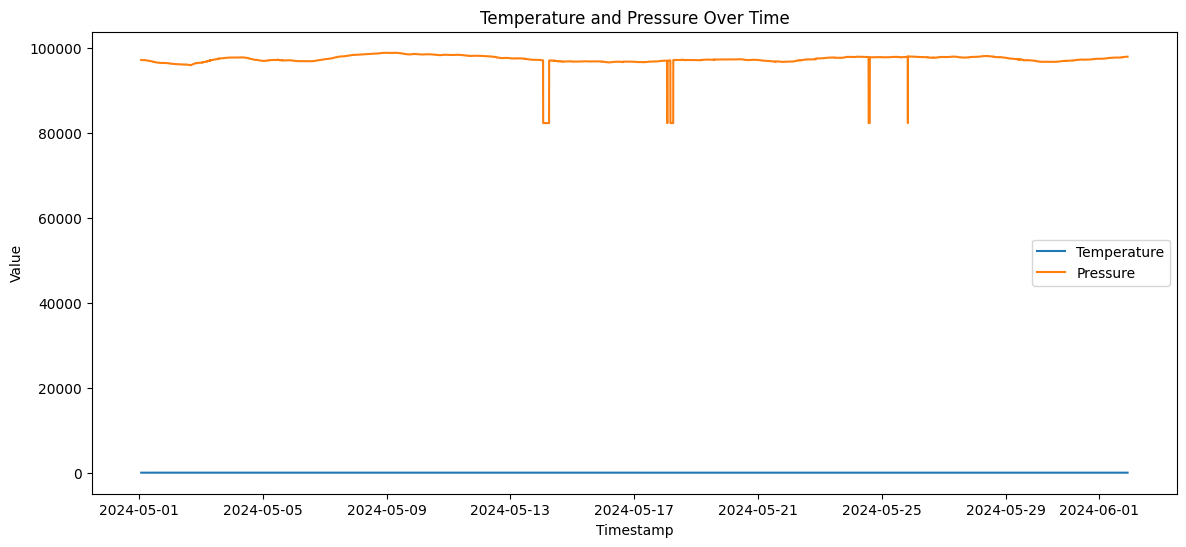

In [5]:
# 2. Trend Analysis
plt.figure(figsize=(14, 6))
plt.plot(data['Timestamp'], data['Temperature'], label='Temperature')
plt.plot(data['Timestamp'], data['Pressure'], label='Pressure')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Temperature and Pressure Over Time')
plt.legend()
plt.show()

In [6]:
# 3. Correlation Analysis
correlation = data['Temperature'].corr(data['Pressure'])
print(f"\nCorrelation between Temperature and Pressure: {correlation}")



Correlation between Temperature and Pressure: 0.05979826440791096


In [7]:
# 4. Outlier Detection
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

temp_outliers = detect_outliers(data['Temperature'])
pressure_outliers = detect_outliers(data['Pressure'])

print("\nTemperature Outliers:\n", temp_outliers)
print("\nPressure Outliers:\n", pressure_outliers)



Temperature Outliers:
 332      19.77
333      19.62
334      19.68
335      19.87
336      19.79
         ...  
75735    18.41
75736    18.23
75737    18.86
75738    19.29
75739    19.69
Name: Temperature, Length: 2351, dtype: float64

Pressure Outliers:
 33975    82381.08
33976    82381.08
33977    82381.08
33978    82381.08
33979    82381.08
           ...   
62871    82381.08
62872    82381.08
62873    82381.08
62874    82381.08
62875    82381.08
Name: Pressure, Length: 998, dtype: float64
